In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
%matplotlib inline
# cufflinks is a python library that connects plotly with pandas so that we can create charts directly on data frames.
import cufflinks as cf 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

### you have to install the following libraries
- pip install cufflinks
- pip install plotly

In [2]:
# to connect python and pandas with interactive javascript library
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

### Fake Data

In [3]:
df = pd.DataFrame(np.random.randn(100,4), columns='A B C D'.split()) # 100*4 array
df.head()

,A,B,C,D
0,-0.721184,1.936318,1.485902,-1.424896
1,-1.460523,0.783691,-0.338826,-0.327342
2,2.154949,-1.191346,0.564341,-1.251243
3,-0.497612,-0.644128,1.261488,0.035719
4,0.452848,1.168790,1.677923,-0.883136


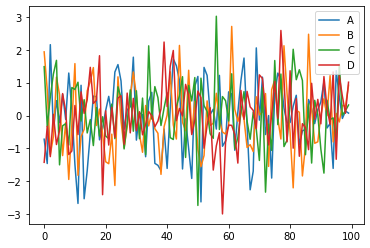

In [4]:
df.plot();

In [5]:
# you have to install the following library
# pip install chart_studio
import chart_studio.plotly as py

In [6]:
df.iplot()

# Scatter

In [7]:
df.iplot(kind='scatter', x='A', y='B', mode='markers',size=10)

# Bar Plots

In [8]:
df2 = pd.DataFrame({'Category':['A','B','C'],'Values':[32,43,50]})
df2.head()

,Category,Values
0,A,32
1,B,43
2,C,50


In [9]:
df2.iplot(kind='bar',x='Category',y='Values')

In [10]:
df.iplot(kind='bar')

In [11]:
df.sum().iplot(kind='bar')

# Boxplots

In [12]:
df.iplot(kind='box')

# 3d Surface

In [13]:
df3 = pd.DataFrame({'x':[1,2,3,4,5],'y':[10,20,30,20,10],'z':[5,4,3,2,1]})
df3.iplot(kind='surface',colorscale='rdylbu')

# Spread

In [14]:
df[['A','B']].iplot(kind='spread')

# Histogram

In [15]:
df['A'].iplot(kind='hist',bins=25)

In [16]:
df.iplot(kind='hist',bins=25)

In [17]:
df.iplot(kind='bubble',x='A',y='B',size='C')

# Scatter Matrix

In [18]:
df.scatter_matrix()

In [19]:
# import seaborn as sns 
# data = sns.load_dataset("iris")
# https://seaborn.pydata.org/generated/seaborn.load_dataset.html
import plotly.express as px
df = px.data.iris()
print(df.shape)
df.head()

(150, 6)


,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [20]:
# https://plotly.com/python/line-and-scatter/
fig = px.scatter(df, 
                 x="sepal_width", y="sepal_length", 
                 color="species", facet_row="species",# separate rows based on the selected column
                 size='petal_length', title = "Plotly Scatter Chart")
fig.show()

In [21]:
fig = px.scatter_3d(df, 
                 x="sepal_width", y="sepal_length", z="petal_length",
                 color="species", size='petal_length', 
                    title = "Plotly 3D Scatter Chart")
fig.show()

In [22]:
fig = px.line(df, 
              #x="sepal_width", 
              y="sepal_length", 
              #color="species", 
              hover_data = ["species", "petal_width"], # Add more data when hover 
              title = "Plotly Line Chart")
fig.show()

In [23]:
fig = px.bar(df,
    x = df["species"].value_counts().index, # labels 
    y = df["species"].value_counts().values, # values
    labels={"x":"Species Catagories", "y":"Count"},
    title = "Plotly Bar Chart")
fig.show()

## Plotly Dashboard
- # https://dash.plotly.com/dash-core-components
#### You have to install:
- pip install jupyter-dash

### Resources:
- https://dash.gallery/Portal/
- https://plotly.com/python/getting-started/
- https://plotly.com/python/

In [24]:
from jupyter_dash import JupyterDash
import dash_html_components as html
import dash_core_components as dcc

In [25]:
app = JupyterDash(__name__)

app.layout = html.Div([
    dcc.Checklist(
    ['New York City', 'Montréal', 'San Francisco'],
    ['New York City', 'Montréal']
)
])

if __name__ == '__main__':
    app.run_server(mode="inline")

In [26]:
app = JupyterDash(__name__)

app.layout = html.Div([
    dcc.Dropdown(['NYC', 'MTL', 'SF'], 
                 'NYC', 
                 id='demo-dropdown')
])

if __name__ == '__main__':
    app.run_server(mode="inline")

In [27]:
# https://dash.plotly.com/dash-core-components/rangeslider
app = JupyterDash(__name__)

app.layout = html.Div([
    html.Label('Choose from RangeSlider'),
   dcc.RangeSlider(0, 20, 1, value=[5, 15], id='my-range-slider'),
    html.Div(id='output-container-range-slider')
])

if __name__ == '__main__':
    app.run_server(mode="inline")

In [28]:
# **
app = JupyterDash(__name__)

app.layout = html.Div([
    html.Label('Dropdown'),

    html.Label('Multi-Select Dropdown'),
    dcc.Dropdown(
        options=[
            {'label': 'New York City', 'value': 'NYC'},
            {'label': u'Montréal', 'value': 'MTL'},
            {'label': 'San Francisco', 'value': 'SF'}
        ],
        value='NYC',
        multi=True
    ),
    


    html.Label('Checkboxes'),
    dcc.Checklist(
        options=[
            {'label': 'New York City', 'value': 'NYC'},
            {'label': u'Montréal', 'value': 'MTL'},
            {'label': 'San Francisco', 'value': 'SF'}
        ],
        value=['MTL', 'SF']
    ),

    html.Label('Text Input'),
    dcc.Input(value='MTL', type='text'),

    html.Label('Slider'),
    dcc.Slider(
        min=0,
        max=9,
        marks={i: 'Label {}'.format(i) if i == 1 else str(i) for i in range(1, 10)},
        value=5,
    ),
], style={'columnCount': 2})

if __name__ == '__main__':
    app.run_server(mode="inline")

In [29]:
from dash.dependencies import Input, Output
app = JupyterDash(__name__)

app.layout = html.Div([
    html.H6("Change the value in the text box to see callbacks in action!"),
    html.Div(["Input: ",
              dcc.Input(id='my-input', value='initial value', type='text')]),
    html.Br(),
    html.Div(id='my-output'),

])


@app.callback(
    Output(component_id='my-output', component_property='children'),
    Input(component_id='my-input', component_property='value')
)
def update_output_div(input_value):
    return 'Output: {}'.format(input_value)


if __name__ == '__main__':
    app.run_server(mode="inline")

In [30]:
import seaborn as sns 
df = sns.load_dataset("titanic")
df["survived"] = df["survived"].astype("str")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
app = JupyterDash(__name__)


class_label = ['First', 'Second', 'Third', 'None']


app.layout = html.Div([
                       html.H1("Titanic Dash App"),

                       dcc.Graph(id="graph"),

                       html.Label([
                                   "Survived/Not Survived",
                                    dcc.Dropdown(
                                        id='survive', 
                                        clearable=False,
                                        value= -1, 
                                        options=[{'label': "Survived", 'value': "1"},
                                                 {'label': "Not Survived", 'value': "0"},
                                                 {'label': "Both", 'value': -1}]
                                        )
                       ]),
                       
                       html.Br([]),

                       html.Label([
                                   "Class",
                                   dcc.RadioItems(
                                       id="class",
                                       options=[{'label':x, "value":x} for x in class_label],
                                       value='None',
                                       labelStyle={'display': 'inline-block'}
                                    )  
                                                        ])

                       
])


@app.callback(
    Output('graph', 'figure'),
    [Input("survive", "value"),
     Input("class", "value")]
)


def update_figure(val_survived, val_class):

    if  (val_class != "None") & (val_survived == -1) :

        test = df[df["class"] == val_class]
        return px.scatter(
        test, 
        x="age", 
        y="fare",
        render_mode="webgl",
        color="survived",
        title="Titanic"
        )

    elif (val_class == "None") & (val_survived != -1):

        test = df[df["survived"] == val_survived]
        return px.scatter(
        test, 
        x="age", 
        y="fare",
        render_mode="webgl",
        facet_row="class",
        title="Titanic"
        )
    elif (val_class == "None") & (val_survived == -1):

        test = df
        return px.scatter(
        test, 
        x="age", 
        y="fare",
        render_mode="webgl",
        color="survived",
        facet_row="class",
        hover_data=["survived"],
        title="Titanic: 1='Survived', 0='Not Survived'",
        )

    else:
        test = df[(df["class"] == val_class) & (df["survived"] == val_survived)] # filter for 0 or 1
        return px.scatter(
            test, 
            x="age", 
            y="fare",
            render_mode="webgl",
            title="Titanic",
            )


if __name__ == '__main__':
    app.run_server(debug=True)

Dash app running on http://127.0.0.1:8050/
